In [1]:
from google.colab import drive 
drive.mount('Colab_Notebooks')

Mounted at Colab_Notebooks


In [2]:
#import pandas package
import pandas as pd
#load csv data into pandas dataframe
import numpy as np
#filtering stopwords
df=pd.read_csv('/content/Colab_Notebooks/MyDrive/2019.csv')
tweets=''
for tweet in df['tweet']:
  tweets += tweet + ' '
tweets

'@Joe__Wakefield @austinbarnard45 @tjq1190 @tyger_cyber @fawfulfan @_Mikemo This is a pretty awful lie. I left South Africa by myself when I was 17 with just a backpack &amp; suitcase of books. Worked on my Mom’s cousin’s farm in Saskatchewan &amp; a lumber mill in Vancouver. Went to Queens Univ with scholarship &amp; debt, then same to UPenn/Wharton &amp; Stanford. @austinbarnard45 @tjq1190 @tyger_cyber @fawfulfan @_Mikemo This person blocked me, so can’t read the tweet. Whats their deal? @IrinaAntony @tjq1190 @tyger_cyber @fawfulfan @_Mikemo We started Zip2 with ~$2k from me plus my overclocked home-built PC, ~$5k from my bro &amp; ~$8k from Greg Kouri (such a good guy — he is greatly missed).  My Dad provided 10% of a ~$200k angel funding round much later, but by then risk was reduced &amp; round would’ve happened anyway. @tjq1190 @tyger_cyber @fawfulfan @_Mikemo He didn’t own an emerald mine &amp; I worked my way through college, ending up ~$100k in student debt. I couldn’t even af

1.Compute word frequencies for each year. Exclude the stop words

In [3]:
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('word_tokenize')
all_words = word_tokenize(tweets)
stop_words = set(stopwords.words('english'))
stop_words.update(['@', ',', 'A', '.', ':', ';', '&', 'I', '!', '’', ')', '(', '🤣', '?', 'The', '“', '”','We', 'In', 'It', 'This', 'If'])
filtered_words = []
for word in all_words:
    if word not in stop_words:
        filtered_words.append(word)

word_analysis = nltk.FreqDist(filtered_words)
word_analysis.items()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


dict_items([('Joe__Wakefield', 1), ('austinbarnard45', 22), ('tjq1190', 4), ('tyger_cyber', 4), ('fawfulfan', 4), ('_Mikemo', 4), ('pretty', 35), ('awful', 3), ('lie', 4), ('left', 22), ('South', 11), ('Africa', 4), ('17', 12), ('backpack', 3), ('amp', 1218), ('suitcase', 2), ('books', 9), ('Worked', 2), ('Mom', 10), ('cousin', 4), ('farm', 6), ('Saskatchewan', 2), ('lumber', 1), ('mill', 1), ('Vancouver', 2), ('Went', 3), ('Queens', 1), ('Univ', 3), ('scholarship', 1), ('debt', 6), ('UPenn/Wharton', 1), ('Stanford', 4), ('person', 32), ('blocked', 4), ('read', 29), ('tweet', 18), ('Whats', 1), ('deal', 15), ('IrinaAntony', 1), ('started', 10), ('Zip2', 8), ('~', 24), ('$', 153), ('2k', 5), ('plus', 28), ('overclocked', 1), ('home-built', 1), ('PC', 6), ('5k', 10), ('bro', 7), ('8k', 1), ('Greg', 3), ('Kouri', 1), ('good', 230), ('guy', 16), ('—', 21), ('greatly', 5), ('missed', 5), ('My', 54), ('Dad', 4), ('provided', 11), ('10', 64), ('%', 199), ('200k', 3), ('angel', 2), ('funding',

2.Show top 10 words (for each year) by the highest value of word frequency

In [4]:
word_analysis.tabulate(10)

         Tesla            amp          https         SpaceX           http          Model            Yes           like Erdayastronaut            car 
          1316           1218           1139            426            411            364            315            301            300            269 


3.Plot histogram of word frequencies for each year

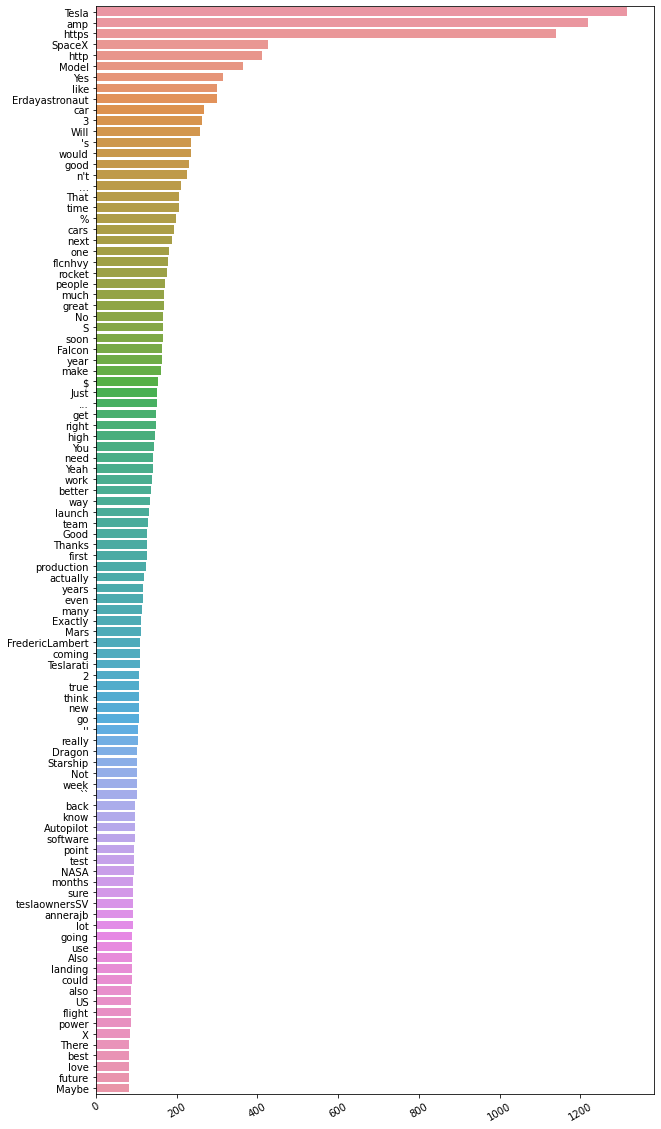

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
word_analysis_data_series = pd.Series(dict(word_analysis.most_common(100)))
# word_analysis_data_series = pd.Series(dict(word_analysis))

fig, ax = plt.subplots(figsize=(10,20))

word_frequency_plot = sns.barplot(y=word_analysis_data_series.index, x=word_analysis_data_series.values, ax=ax)
plt.xticks(rotation=30);

4.Use Zipf’s law and plot log-log plots of word frequencies and rank for each year

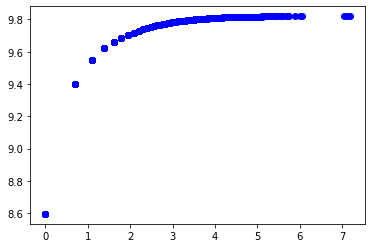

In [6]:
import scipy.stats as ss
import math
word_rank = ss.rankdata([freq for freq in word_analysis.values()])
log_freq = [math.log(freq) for freq in word_analysis.values()]
log_rank = [math.log(rank) for rank in word_rank]
plt.plot(log_freq, log_rank, 'bo')

5.Create bigram network graphs for each year

In [9]:
bigram_words = list(nltk.bigrams(filtered_words))
bigram_word_analysis = nltk.FreqDist(bigram_words)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128059 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128420 missing from current font.
  fon

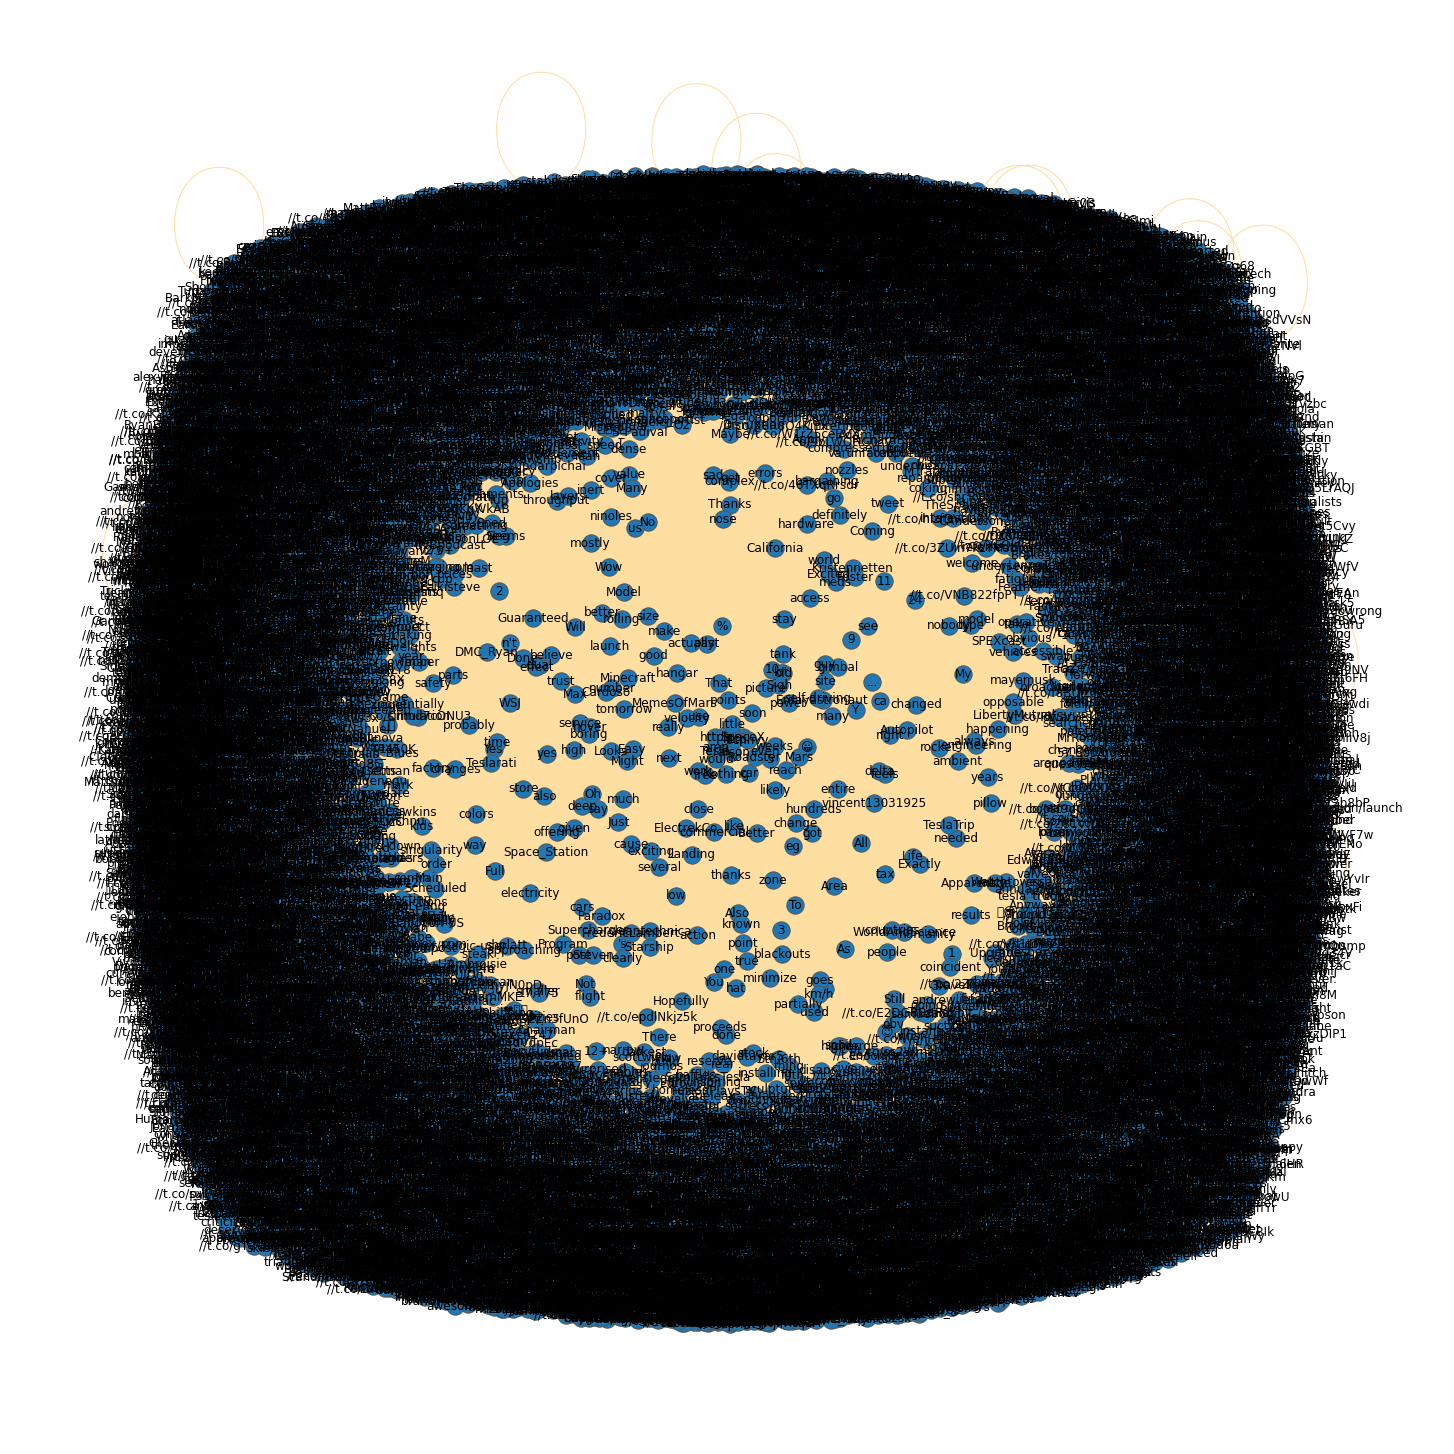

In [11]:
import networkx as nx
G = nx.Graph()
for index, row in bigram_word_analysis.most_common():
  G.add_weighted_edges_from([(index[0], index[1], row)])  

plt.figure(figsize=(20,20))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=10), **options)
# nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50))
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()